**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.tree

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

А.П. Возвращает кортеж из двух массивов: первый содержит два столбца (признака), второй - один столбец (номер класса):

In [3]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [24]:
#print(classification_problem)
#print(type(classification_problem))

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

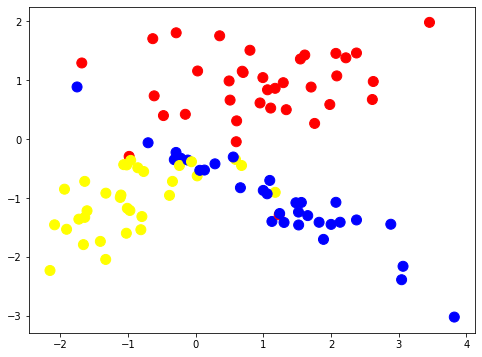

In [5]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)


In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель DecisionTreeClassifier

In [7]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [8]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [9]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Разделяющая поверхность

In [43]:
def get_meshgrid(data, step=0.05, border=0.5):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

А.П. Функция возвращает координатные матрицы:

In [56]:
xx, yy = get_meshgrid(train_data, step = 3)
print(xx, '\n')
print(yy)

[[-2.65412795  0.34587205  3.34587205]
 [-2.65412795  0.34587205  3.34587205]
 [-2.65412795  0.34587205  3.34587205]] 

[[-3.52454592 -3.52454592 -3.52454592]
 [-0.52454592 -0.52454592 -0.52454592]
 [ 2.47545408  2.47545408  2.47545408]]


А.П. Массив можно "развернуть" с помощью функции ravel()

In [47]:
xx.ravel()

array([-2.65412795,  0.34587205,  3.34587205, -2.65412795,  0.34587205,
        3.34587205, -2.65412795,  0.34587205,  3.34587205])

А.П. Значит, чтобы получит координаты всех точек сетки, необходимо сделать следующее:

In [48]:
np.c_[xx.ravel(), yy.ravel()]

array([[-2.65412795, -3.52454592],
       [ 0.34587205, -3.52454592],
       [ 3.34587205, -3.52454592],
       [-2.65412795, -0.52454592],
       [ 0.34587205, -0.52454592],
       [ 3.34587205, -0.52454592],
       [-2.65412795,  2.47545408],
       [ 0.34587205,  2.47545408],
       [ 3.34587205,  2.47545408]])

А.П. Можем предсказать значение с помощью заранее обученного алгоритма. Тогда получаем вектор ответов для каждой точки:

In [51]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)
estimator.fit(train_data, train_labels)
estimator.predict(np.c_[xx.ravel(), yy.ravel()])

array([2, 2, 2, 2, 2, 2, 0, 0, 0])

А.П. И затем обратно формируем массив ответов в соответствии с размерностью координатных матриц:

In [54]:
estimator.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

array([[2, 2, 2],
       [2, 2, 2],
       [0, 0, 0]])

In [45]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

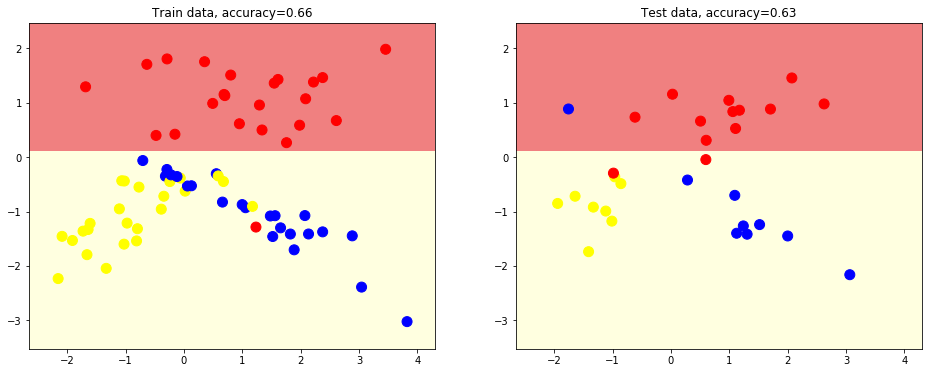

In [46]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

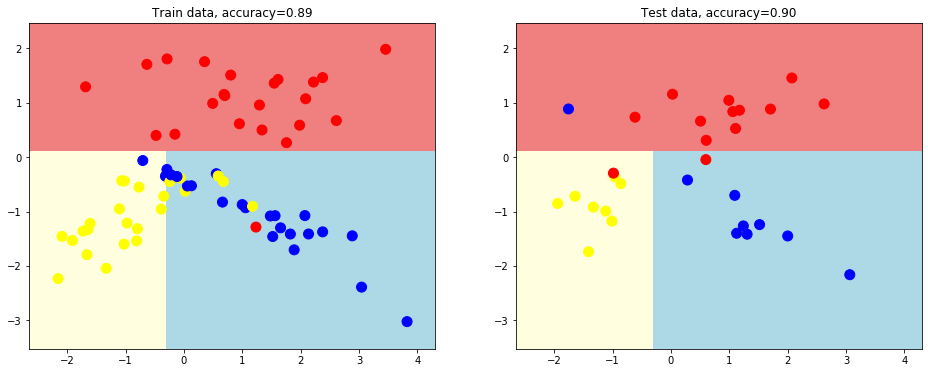

In [57]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

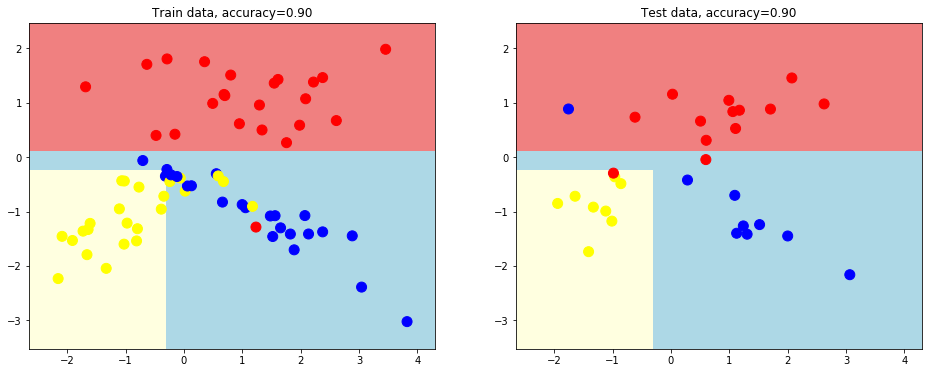

In [58]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

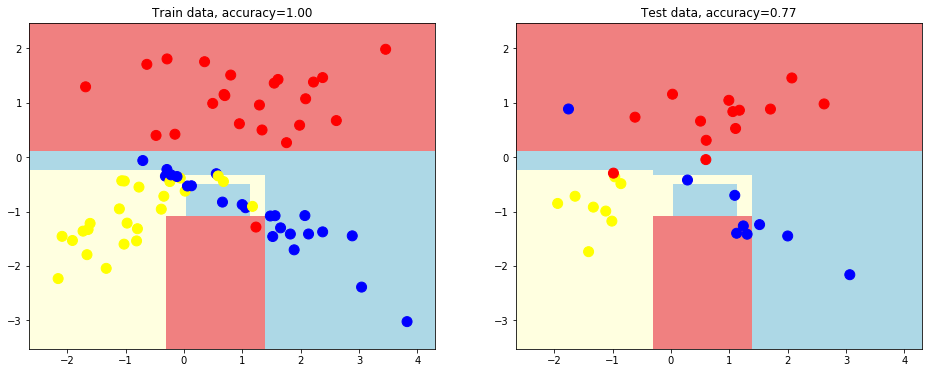

In [17]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

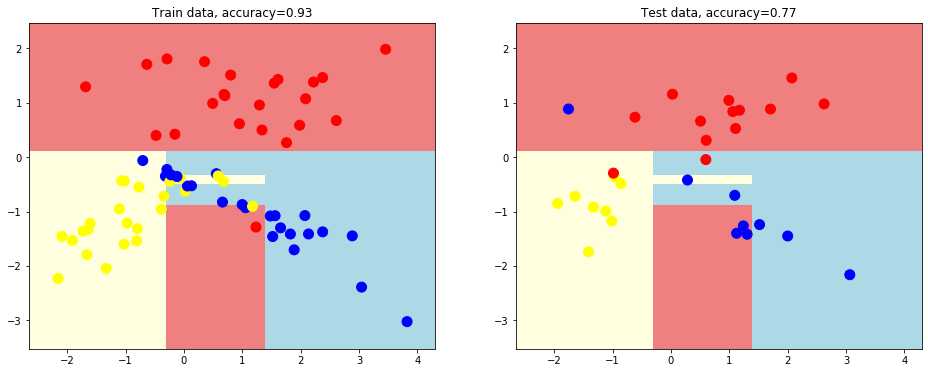

In [60]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3), 
                      train_data, train_labels, test_data, test_labels)